In [34]:
#login to twitter 

PATH = "C:/Users/hp/Downloads/edgedriver_win64/msedgedriver.exe"
driver = webdriver.Edge(PATH)

url="https://twitter.com/search?q=%23palestine&src=typed_query&f=top"
driver.get(url)

# Setup the log in
sleep(3)
username = driver.find_element(By.XPATH,"//input[@name='text']")
username.send_keys("jadir99")
next_button = driver.find_element(By.XPATH,"//span[contains(text(),'Next')]")
next_button.click()

sleep(3)
password = driver.find_element(By.XPATH,"//input[@name='password']")
password.send_keys('jadir99jadir99')
log_in = driver.find_element(By.XPATH,"//span[contains(text(),'Log in')]")
log_in.click()

C:\Users\hp\AppData\Local\Temp\ipykernel_17036\898926764.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(PATH)


In [36]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
from selenium.common.exceptions import StaleElementReferenceException
import pandas as pd

In [37]:


UserTags = []
TimeStamps = []
Tweets = []
Replys = []
reTweets = []
Likes = []

start_time = time.time()  # Get the start time

while len(UserTags)<=900:
    
    # Find all the tweet article elements on the page
    articles = driver.find_elements(By.XPATH, "//article[@data-testid='tweet']")
    
    # Extract data from each article
    for article in articles:
        try:
            UserTag = article.find_element(By.XPATH, ".//span[@class='css-1qaijid r-bcqeeo r-qvutc0 r-poiln3']").text
            if UserTag not in UserTags:
                UserTags.append(UserTag)

            TimeStamp = article.find_element(By.XPATH, ".//time").get_attribute('datetime')
            if TimeStamp not in TimeStamps:
                TimeStamps.append(TimeStamp)

            Tweet = article.find_element(By.XPATH, ".//div[@data-testid='tweetText']").text
            if Tweet not in Tweets:
                Tweets.append(Tweet)
                
        except StaleElementReferenceException:
            continue

    # Scroll down to the bottom of the page
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(3)  # Wait for the page to load more articles


KeyboardInterrupt: 

In [4]:
# cleaning data :
import nltk 
import pandas as pd 
# nltk.download('punkt')
df=pd.read_excel("test.xlsx")

In [31]:
import string 
 #function to remove all stop words :
fr=stopwords.words('english')
ang=stopwords.words('french')
arabe=stopwords.words('arabic')

def remove_stopWords(text):
    # clean from stopword
    word_token=word_tokenize(text)
    clear_tweet = [w.translate(str.maketrans('', '', string.punctuation)) for w in text.split() if not w.lower() in fr and w.lower() not in ang]
    # clean from hasthtags and @
    return ' '.join(clear_tweet)    




In [33]:
#function to clear data of each list 
def clear_data(list):
    clear_tweets = []
    for tweet in list:
        clear_tweet = []
        for word in tweet.split():
            if word.startswith("#") and len(word) > 1:
                continue  # Skip hashtags
            elif word.startswith("@"):
                continue  # Skip mentions
            elif word.startswith("http"):
                continue
            else:
                # l'appelde fonction qui filtre par les ponctuation et les stops words 
                clear_tweet.append(remove_stopWords(word))
        clear_tweets.append(" ".join(clear_tweet))
    return clear_tweets

In [38]:
df = pd.DataFrame(zip(clear_data(UserTags),TimeStamps,clear_data(Tweets))
                  ,columns=['UserTags','time','Tweets'])
df.to_excel(r"twitter.xlsx", index=False)
df.head()

,UserTags,time,Tweets
0,Mick Wallace,20240418T163110000Z,stop talking
1,Syed Hasan Imam Zaidi,20240418T191836000Z,resistance detonates huge explosive device ...
2,Nazeefa Fatima,20240418T145632000Z,20 days old Whats fault Israeli terrorists...
3,shahnawaz khan Shannu,20240415T005430000Z,silent
4,HylldaDanyella,20240418T171906000Z,never make hate


In [ ]:
from textblob import TextBlob
# analyse the sentiment :
def get_tweet_sentiment(tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
sentiments=[]
for tweet in df['Tweets']:
     sentiments.append(get_tweet_sentiment(tweet))
df['sentiments']=sentiments

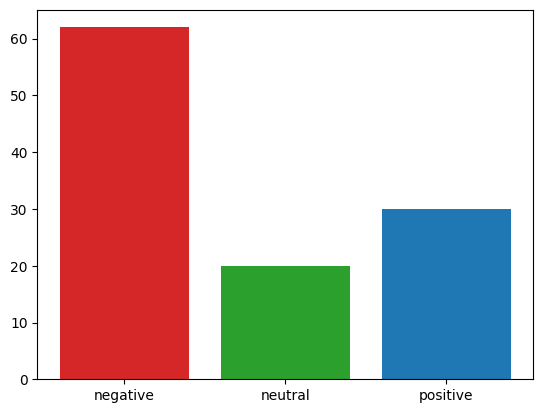

In [61]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
sentiments=['negative','neutral','positive']
counts=[len(df[df['sentiments'] == 'neutral']),len(df[df['sentiments'] == 'negative']),len(df[df['sentiments'] == 'positive'])]
bar_labels=['red','green','blue']
bar_colors=['tab:red','tab:green','tab:blue']
ax.bar(sentiments,counts,label=bar_labels,color=bar_colors)
plt.show()